# Profundidad desarrollada de un pozo desviado

Este ejercicio tiene por objetivo calcular la longitud total de un pozo desviado con base en el teorema de Pitágoras y generar un archivo ASCII con los resultados. Los datos de entrada son la profundidad vertical verdadera (TVD, por sus siglas en inglés) y los desplazamientos Este y Norte. El archivo de salida debe contener la profundidad desarrollada (MD, por sus siglas en inglés) y las coordenadas UTM absolutas. Las coordenadas de superficie ficticas son: Este = 300100 [m], Norte = 5000100 [m], Elevación = 0 [m].

El lector podrá familiarizarse con la lectura de datos en formato CSV (del inglés, _comma-separated values_), manipular los datos, hacer operaciones aritméticas y graficar a través de las bibliotecas pandas, numpy y matplotlib.

#### 1. Definir bibliotecas a utilizar

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

#### 2. Lectura del archivo trayectoria.csv como un archivo _Pandas DataFrame_

In [2]:
tr=pd.read_csv('Trayectoria_offset-Pozo_A.csv') 

In [3]:
type(tr) #Tipo de variable

pandas.core.frame.DataFrame

**Descripción estadística del los datos**

In [4]:
tr.describe() 

,TVD,XOFFSET,YOFFSET
count,112.000000,112.000000,112.000000
mean,3815.625000,394.419643,394.419643
std,2272.225873,350.496910,350.496910
min,0.000000,0.000000,0.000000
25%,1872.500000,0.000000,0.000000
50%,3815.000000,412.500000,412.500000
75%,5757.500000,775.000000,775.000000
max,7700.000000,775.000000,775.000000


In [5]:
print(tr)

      TVD  XOFFSET  YOFFSET
0       0        0        0
1       0        0        0
2      70        0        0
3     140        0        0
4     210        0        0
5     280        0        0
6     350        0        0
7     420        0        0
8     490        0        0
9     560        0        0
10    630        0        0
11    700        0        0
12    770        0        0
13    840        0        0
14    910        0        0
15    980        0        0
16   1050        0        0
17   1120        0        0
18   1190        0        0
19   1260        0        0
20   1330        0        0
21   1400        0        0
22   1470        0        0
23   1540        0        0
24   1610        0        0
25   1680        0        0
26   1750        0        0
27   1820        0        0
28   1890        0        0
29   1960        0        0
..    ...      ...      ...
82   5670      775      775
83   5740      775      775
84   5810      775      775
85   5880      775  

#### 3. Visualización

##### Gráfica 2D

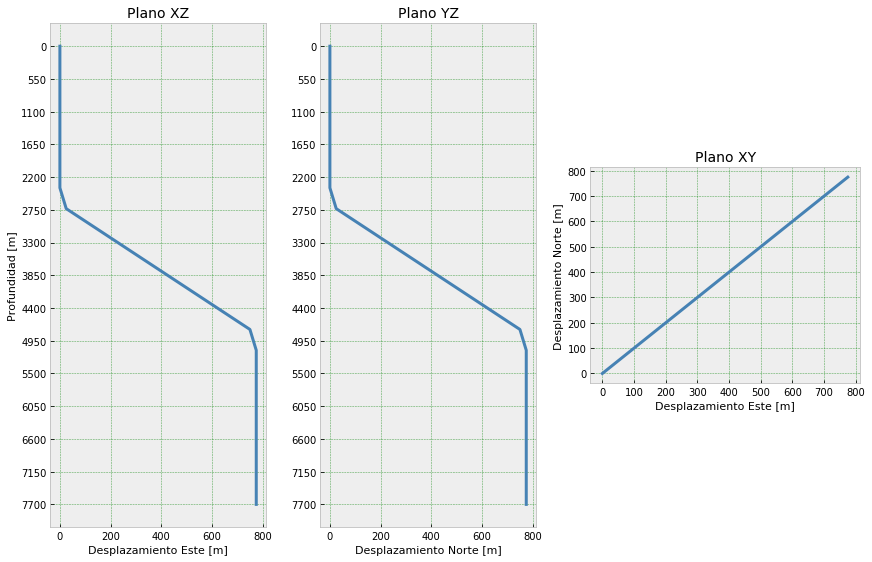

In [6]:
################################
f1 = plt.figure(figsize = [15,10])
plt.style.use('bmh')

#Plano XZ

fig1 = f1.add_axes([0, 0, 0.2,0.7]) 
fig1.plot(tr.XOFFSET, tr.TVD,'steelblue', alpha=1, lw=3)
fig1.set_title('Plano XZ', fontsize='14')
fig1.set_ylabel('Profundidad ' + '[m]', fontsize = '11' )
fig1.set_xlabel('Desplazamiento Este '+ '[m]', fontsize = '11')
fig1.set_yticks(np.linspace (min(tr.TVD),max(tr.TVD),15) )
fig1.set_xticks( np.linspace (min(tr.XOFFSET), 800, 5))
fig1.invert_yaxis()
fig1.grid(True, c="g", alpha=0.7)

#Plano YZ

fig2 = f1.add_axes([0.25, 0, 0.2,0.7]) 
fig2.plot(tr.YOFFSET, tr.TVD,'steelblue', alpha=1, lw=3)
fig2.set_title('Plano YZ', fontsize='14')
fig2.set_xlabel('Desplazamiento Norte '+ '[m]', fontsize = '11')
fig2.set_yticks(np.linspace (min(tr.TVD),max(tr.TVD),15) )
fig2.set_xticks( np.linspace (min(tr.XOFFSET), 800, 5))
fig2.invert_yaxis()
fig2.grid(True, c="g", alpha=0.7)

#Plano XY

fig3 = f1.add_axes([0.50, 0.2, 0.25,0.3]) 
fig3.plot(tr.YOFFSET, tr.XOFFSET,'steelblue', alpha=1, lw=3)
fig3.set_title('Plano XY', fontsize='14')
fig3.set_ylabel('Desplazamiento Norte ' + '[m]', fontsize = '11' )
fig3.set_xlabel('Desplazamiento Este '+ '[m]', fontsize = '11')
fig3.grid(True, c="g", alpha=0.7)

plt.show()

##### Gráfica 3D

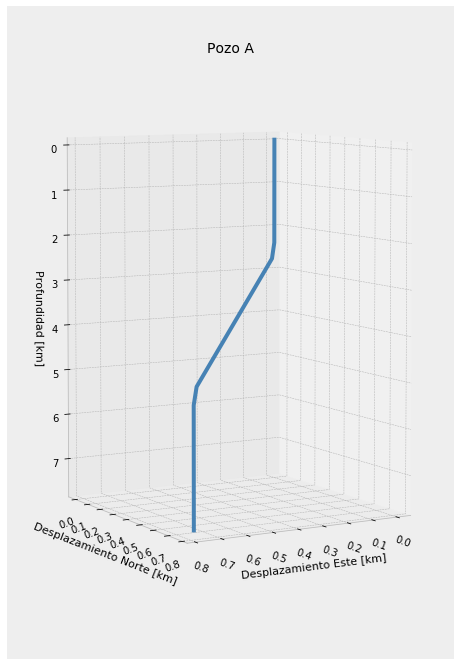

In [7]:
fig = plt.figure(figsize=[8, 12])
fig4 = fig.gca(projection='3d')

fig4.plot(tr.XOFFSET/1000, tr.YOFFSET/1000,tr.TVD/1000,  'steelblue', lw=4)
fig4.set_title("Pozo A", color= "k", fontsize= 14)
fig4.invert_zaxis()
fig4.invert_xaxis()
fig4.invert_yaxis()
fig4.set_xlabel('Desplazamiento Este [km]' , fontsize=11)
fig4.set_ylabel('Desplazamiento Norte [km]' , fontsize=11)
fig4.set_zlabel('Profundidad [km]', fontsize=11)
_ = plt.yticks(rotation = 20)
_ = plt.xticks(rotation = -20)

fig4.view_init(elev=5, azim=-120)

fig4.grid(True, c="g", alpha=0.7)

#plt.savefig('survey3D.png', transparent=True, dpi=600, bbox_inches="tight" )


plt.show()

#### 4. Cálculo de los valores absolutos de las coordenas Este y Norte

Las coordenadas de superficie son: Este-300100[m] Norte-5000100[m]

In [8]:
este=300100 
norte=5000100

xabs = este + tr.XOFFSET
yabs= norte + tr.YOFFSET

#### 5. Cálculo de la profundidad desarrollada

Con base en el teorema de Pitágoras calculamos la hipotenusa del plano horizontal (XY) y el plano vertical.

In [9]:
delta_xoffset = np.diff(tr.XOFFSET) #Diferencia del desplazamiento de X-OFFSET
delta_yoffset = np.diff(tr.YOFFSET) #Diferencia del desplazamiento de Y-OFFSET
deltaz_tvd = np.diff(tr.TVD) #Diferencia de la TVD

In [10]:
delta_xy = np.sqrt(pow(delta_xoffset, 2) + pow(delta_yoffset,2)) #Hipotenusa en el plano XY
delta_tr = np.sqrt(pow(delta_xy,2) + pow(deltaz_tvd,2)) #Diferencias sobre la trayectoria del Pozo-A

In [11]:
md = np.round(np.cumsum(delta_tr),3) #Cálculo de la suma acumulada de las diferencias sobre la trayectoria del Pozo-A

In [12]:
print('md (renglones)', len(md))

md (renglones) 111


Escalar los datos **tr** para que sea de la misma dimensión que el vector **md** (111 renglones). 

In [13]:
tr_md = tr.iloc[ 1 : 112 , :] # Quitamos el renglón con el índice 0. Este renglón se agregó a los datos originales para poder calcular las diferencias de la celda 9 

In [14]:
print ('tr_md (reglones) =' , len(tr_md)) ; print ('md (reglones) =' ,len(md))

tr_md (reglones) = 111
md (reglones) = 111


#### 6. Integrar los datos calculados en la tabla de datos original

Función [pandas.DataFrame.assign](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.assign.html)

In [15]:
tr_tot = tr_md.assign(XABS=xabs, YABS=yabs, MD=md)

In [16]:
print(tr_tot)

      TVD  XOFFSET  YOFFSET    XABS     YABS        MD
1       0        0        0  300100  5000100     0.000
2      70        0        0  300100  5000100    70.000
3     140        0        0  300100  5000100   140.000
4     210        0        0  300100  5000100   210.000
5     280        0        0  300100  5000100   280.000
6     350        0        0  300100  5000100   350.000
7     420        0        0  300100  5000100   420.000
8     490        0        0  300100  5000100   490.000
9     560        0        0  300100  5000100   560.000
10    630        0        0  300100  5000100   630.000
11    700        0        0  300100  5000100   700.000
12    770        0        0  300100  5000100   770.000
13    840        0        0  300100  5000100   840.000
14    910        0        0  300100  5000100   910.000
15    980        0        0  300100  5000100   980.000
16   1050        0        0  300100  5000100  1050.000
17   1120        0        0  300100  5000100  1120.000
18   1190 

#### 7. Exportar la tabla en formato CSV

In [17]:
tr_tot.to_csv('Ejercicio-MD.csv', index=False, header=True)